### Lecture 3 - DSAI510 Data Science

# Data Wrangling (Data Munging)

Real-world data often comes with challenges such as being dirty, disorganized, scattered, and containing missing or incorrect entries. Data wrangling addresses these issues, serving as both an art and a science to prepare data for analysis, modeling, and visualization.

The word “wrangling” comes from cattle herding:

In [2]:
import numpy as np
import pandas as pd

## Indexing
Identifies data (i.e. provides metadata) using known indicators that are important for analysis, visualization, and interactive console display.


In [4]:
# Generate a dataframe with random entries
data = np.random.randint(0, 101, size=(7, 3))
df = pd.DataFrame(data, columns = ["foo","bar","zoo"])
df

,foo,bar,zoo
0,90,97,73
1,23,57,36
2,43,58,79
3,100,0,8
4,74,12,42
5,2,47,60
6,23,3,31


In [23]:
# Shuffle rows
df = df.sample(frac=1)
df

,foo,bar,zoo
1,23,57,36
5,2,47,60
6,23,3,31
0,90,97,73
2,43,58,79
4,74,12,42
3,100,0,8


In [24]:
df[:3] # first three rows, i.e., 0th, 1st and 2nd.

,foo,bar,zoo
1,23,57,36
5,2,47,60
6,23,3,31


In [25]:
df.loc[5:6,["foo","zoo"]]

,foo,zoo
5,2,60
6,23,31


In [26]:
df.iloc[3]  # 4th row regardless of index. ("i=integer" location)

foo    90
bar    97
zoo    73
Name: 0, dtype: int64

In [27]:
df2 = df.copy()
fruits = ["apple", "banana", "cherry", "date", "elderberry", "fig", "grape"]
df2.index = fruits
df2

,foo,bar,zoo
apple,23,57,36
banana,2,47,60
cherry,23,3,31
date,90,97,73
elderberry,43,58,79
fig,74,12,42
grape,100,0,8


In [28]:
df2.loc["fig"]

foo    74
bar    12
zoo    42
Name: fig, dtype: int64

In [32]:
# Hierarchical indexing (multi-indexing)
arrays = [
    np.array(["A", "A", "B", "B", "C", "C", "D", "D"]),
    np.array(["one", "two", "one", "two", "one", "two", "one", "two"]),
]
s = pd.Series(np.random.randn(8), index=arrays)
df = pd.DataFrame(np.random.randn(8, 4), index=arrays)
df

0         1         2         3
A one -0.951816  0.054554 -1.396297  0.160841
  two -0.583270 -2.918309 -0.059182 -1.072757
B one -0.606412  1.761665  0.127051 -1.082385
  two -1.018632  0.046473  2.091809 -0.758007
C one -1.302890 -0.910144 -1.063954 -0.999601
  two  0.206553  0.858994 -0.536371 -1.041313
D one  2.104417 -1.017442 -0.770815  1.328013
  two  1.088221 -0.392961  0.527263 -0.426460

In [33]:
df.loc["A"]

,0,1,2,3
one,-0.951816,0.054554,-1.396297,0.160841
two,-0.583270,-2.918309,-0.059182,-1.072757


In [34]:
df.loc["A","one"]

0   -0.951816
1    0.054554
2   -1.396297
3    0.160841
Name: (A, one), dtype: float64

In [37]:
df.loc[("A","one"),2]

-1.3962965776660925

## Concatanation 

In [38]:
data = np.random.randint(0, 101, size=(2, 3))
df1 = pd.DataFrame(data)
data = np.random.randint(0, 101, size=(2, 3))
df2 = pd.DataFrame(data)
display(df1,df2)

,0,1,2
0,38,80,6
1,4,32,67


,0,1,2
0,86,68,34
1,21,39,88


In [39]:
df_concat_axis0 = pd.concat([df1,df2],axis=0)
df_concat_axis0

,0,1,2
0,38,80,6
1,4,32,67
0,86,68,34
1,21,39,88


In [40]:
df_concat_axis1 = pd.concat([df1,df2],axis=1)
df_concat_axis1

,0,1,2,0,1,2
0,38,80,6,86,68,34
1,4,32,67,21,39,88


## Merging with inner and outer join

In [41]:
# Create first DataFrame
df1 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
    'K': ['K0', 'K1', 'K2', 'K3']
})

# Create second DataFrame
df2 = pd.DataFrame({
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3'],
    'K': ['K0', 'K1', 'K2', 'K4']
})

display(df1,df2)

# Notice df1 and df2 have common and uncommon K values. 
# Common ones: K0, K1, K2. Uncommon ones: K3 and K4

,A,B,K
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K2
3,A3,B3,K3


,C,D,K
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K4


In [43]:
# Inner join (it joins according to common K values; K0, K1, K2)
inner_join = df1.merge(df2, on='K', how='inner')
inner_join

,A,B,K,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2


In [44]:
# outer join (it joins according to all K values)
outer_join = df1.merge(df2, on='K', how='outer')
outer_join

,A,B,K,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,NaN,NaN
4,NaN,NaN,K4,C3,D3


## Reshaping data: pivot, melt, stack, unstack

### pivot_table()

In [50]:
data = {
    'Rep': ['Alice', 'Alice', 'Bob', 'Bob', 'Alice', 'Alice', 'Bob', 'Bob', 'Alice', 'Alice', 'Bob', 'Bob'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Feb', 'Feb', 'Feb', 'Feb', 'Jan', 'Jan', 'Feb', 'Feb'],
    'Product': ['apple', 'banana', 'apple', 'banana', 'apple', 'banana', 'apple', 'banana', 'cherry', 'cherry', 'cherry', 'cherry'],
    'Sales': [100, 150, 110, 120, 105, 155, 115, 125, 130, 140, 135, 145]
}

df = pd.DataFrame(data)
df

# Notice that Alice, Jan, cheery and Bob, Feb, 
# cheery at the end have two separate entries.

,Rep,Month,Product,Sales
0,Alice,Jan,apple,100
1,Alice,Jan,banana,150
2,Bob,Jan,apple,110
3,Bob,Jan,banana,120
4,Alice,Feb,apple,105
5,Alice,Feb,banana,155
6,Bob,Feb,apple,115
7,Bob,Feb,banana,125
8,Alice,Jan,cherry,130
9,Alice,Jan,cherry,140


In [51]:
pivot_df = df.pivot_table(index='Rep', columns=['Month', 'Product'], values='Sales', aggfunc='sum')
pivot_df

Month      Feb                  Jan              
Product  apple banana cherry  apple banana cherry
Rep                                              
Alice    105.0  155.0    NaN  100.0  150.0  270.0
Bob      115.0  125.0  280.0  110.0  120.0    NaN

In [98]:
pivot_df2 = df.pivot_table(index='Rep', columns='Product', values='Sales', aggfunc='sum')
pivot_df2

Product,apple,banana,cherry
Rep,,,
Alice,205,305,270
Bob,225,245,280


### stack()

In [54]:
df

,Rep,Month,Product,Sales
0,Alice,Jan,apple,100
1,Alice,Jan,banana,150
2,Bob,Jan,apple,110
3,Bob,Jan,banana,120
4,Alice,Feb,apple,105
5,Alice,Feb,banana,155
6,Bob,Feb,apple,115
7,Bob,Feb,banana,125
8,Alice,Jan,cherry,130
9,Alice,Jan,cherry,140


In [60]:
stacked_df = pivot_df.stack(level=[0,1])
stacked_df

Rep    Month  Product
Alice  Feb    apple      105.0
              banana     155.0
       Jan    apple      100.0
              banana     150.0
              cherry     270.0
Bob    Feb    apple      115.0
              banana     125.0
              cherry     280.0
       Jan    apple      110.0
              banana     120.0
dtype: float64

In [101]:
unstacked_df = stacked_df.unstack(level='Product')
print(unstacked_df)


Product      apple  banana  cherry
Rep   Month                       
Alice Feb    105.0   155.0     NaN
      Jan    100.0   150.0   270.0
Bob   Feb    115.0   125.0   280.0
      Jan    110.0   120.0     NaN


### melt() transforms df from wide format to long format.

In [108]:
pivot_df_reset = pivot_df.reset_index()
melted_df = pivot_df_reset.melt(id_vars='Rep', value_name='Sales')
#The id_vars parameter in the melt() function specifies which columns should remain fixed (unmelted) when transforming the DataFrame
#  from wide format to long format. 

melted_df

,Rep,Month,Product,Sales
0,Alice,Feb,apple,105.0
1,Bob,Feb,apple,115.0
2,Alice,Feb,banana,155.0
3,Bob,Feb,banana,125.0
4,Alice,Feb,cherry,NaN
5,Bob,Feb,cherry,280.0
6,Alice,Jan,apple,100.0
7,Bob,Jan,apple,110.0
8,Alice,Jan,banana,150.0
9,Bob,Jan,banana,120.0


## String methods

In [3]:
data = {
    'CustomerID': [101, 102, 103, 104, 105],
    'Feedback': [
        'Loved the new camera! Best purchase.',
        'Battery life could be better. It drains quickly.',
        'Amazing phone with a sleek design.',
        'The screen is vibrant, but too large for my taste.',
        'Average phone, nothing exceptional.'
    ]
}

df = pd.DataFrame(data)
df


,CustomerID,Feedback
0,101,Loved the new camera! Best purchase.
1,102,Battery life could be better. It drains quickly.
2,103,Amazing phone with a sleek design.
3,104,"The screen is vibrant, but too large for my ta..."
4,105,"Average phone, nothing exceptional."


In [14]:
df['Feedback']

0                 loved the new camera! best purchase.
1     battery life could be better. it drains quickly.
2                   amazing phone with a sleek design.
3    the screen is vibrant, but too large for my ta...
4                  average phone, nothing exceptional.
Name: Feedback, dtype: object

In [4]:
# Converting feedbacks to lowercase
df['Feedback'] = df['Feedback'].str.lower()
df

,CustomerID,Feedback
0,101,loved the new camera! best purchase.
1,102,battery life could be better. it drains quickly.
2,103,amazing phone with a sleek design.
3,104,"the screen is vibrant, but too large for my ta..."
4,105,"average phone, nothing exceptional."


In [11]:
# Checking if feedback contains the word 'camera'
df['Mentions_Camera'] = df['Feedback'].str.contains('camera')
df

,CustomerID,Feedback,Mentions_Camera
0,101,loved the new camera! best purchase.,True
1,102,battery life could be better. it drains quickly.,False
2,103,amazing phone with a sleek design.,False
3,104,"the screen is vibrant, but too large for my ta...",False
4,105,"average phone, nothing exceptional.",False


In [12]:
# filtering
df[df["CustomerID"]<104]

,CustomerID,Feedback,Mentions_Camera
0,101,loved the new camera! best purchase.,True
1,102,battery life could be better. it drains quickly.,False
2,103,amazing phone with a sleek design.,False


In [13]:
# Get me the records (rows) where Mentions_Camera column has True.
df[df["Mentions_Camera"] == False]

,CustomerID,Feedback,Mentions_Camera
1,102,battery life could be better. it drains quickly.,False
2,103,amazing phone with a sleek design.,False
3,104,"the screen is vibrant, but too large for my ta...",False
4,105,"average phone, nothing exceptional.",False


In [114]:
# Same as above
df[df.Mentions_Camera == True]

,CustomerID,Feedback,Mentions_Camera
0,101,loved the new camera! best purchase.,True


In [115]:
# Counting the number of words in each feedback
df['Word_Count'] = df['Feedback'].str.split().str.len()
df

,CustomerID,Feedback,Mentions_Camera,Word_Count
0,101,loved the new camera! best purchase.,True,6
1,102,battery life could be better. it drains quickly.,False,8
2,103,amazing phone with a sleek design.,False,6
3,104,"the screen is vibrant, but too large for my ta...",False,10
4,105,"average phone, nothing exceptional.",False,4


In [265]:
df['Feedback'].str.split()

0          [Loved, the, new, camera!, Best, purchase.]
1    [Battery, life, could, be, better., It, drains...
2            [Amazing, phone, with, a, sleek, design.]
3    [The, screen, is, vibrant,, but, too, large, f...
4             [Average, phone,, nothing, exceptional.]
Name: Feedback, dtype: object

In [266]:
# Replacing the word 'phone' with '**TELEPHONE**'
df['Feedback'] = df['Feedback'].str.replace('phone', '**TELEPHONE**')
df

,CustomerID,Feedback,Mentions_Camera
0,101,Loved the new camera! Best purchase.,True
1,102,Battery life could be better. It drains quickly.,False
2,103,Amazing **TELEPHONE** with a sleek design.,False
3,104,"The screen is vibrant, but too large for my ta...",False
4,105,"Average **TELEPHONE**, nothing exceptional.",False


## Handling missing values in data

In [62]:
data = {
    'Age': [25, 30, None, 40, 35, pd.NA, 50, 45],
    'Salary': [50000, 55000, 60000, np.nan, 65000, 70000, pd.NA, 75000],
    'Department': ['HR', 'Finance', 'IT', 'Finance', 'IT', None, 'HR', pd.NA]
}

df = pd.DataFrame(data)
df

# "None" is a built-in constant in Python that represents the absence of a value or a null value. 

# NaN stands for "Not a Number" and is a special floating-point value.



,Age,Salary,Department
0,25,50000,HR
1,30,55000,Finance
2,None,60000,IT
3,40,NaN,Finance
4,35,65000,IT
5,<NA>,70000,None
6,50,<NA>,HR
7,45,75000,<NA>


In [132]:
df.isna()

,Age,Salary,Department
0,False,False,False
1,False,False,False
2,True,False,False
3,False,True,False
4,False,False,False
5,True,False,True
6,False,True,False
7,False,False,True


In [138]:
# Missing values in each column
df.isna().sum()

Age           2
Salary        2
Department    2
dtype: int64

In [137]:
# Total number of missing values in the dataframe
df.isna().sum().sum()

6

In [139]:
# Drop rows with any missing values
df_dropped = df.dropna()
df_dropped

,Age,Salary,Department
0,25,50000,HR
1,30,55000,Finance
4,35,65000,IT


In [63]:
# Print df again
df

,Age,Salary,Department
0,25,50000,HR
1,30,55000,Finance
2,None,60000,IT
3,40,NaN,Finance
4,35,65000,IT
5,<NA>,70000,None
6,50,<NA>,HR
7,45,75000,<NA>


In [140]:
# Fill missing entries
df_filled_constant = df.fillna({'Age': 0, 'Salary': 0, 'Department': 'Unknown'})
df_filled_constant


,Age,Salary,Department
0,25,50000,HR
1,30,55000,Finance
2,0,60000,IT
3,40,0,Finance
4,35,65000,IT
5,0,70000,Unknown
6,50,0,HR
7,45,75000,Unknown


In [269]:
# Fill according to averages

# For numeric columns
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

# For non-numeric columns (Filling with mode. Mode is the value that appears the most.)
most_frequent_department = df['Department'].mode().iloc[0]
df['Department'] = df['Department'].fillna(most_frequent_department)

df


,Age,Salary,Department
0,25.0,50000.0,HR
1,30.0,55000.0,Finance
2,37.5,60000.0,IT
3,40.0,62500.0,Finance
4,35.0,65000.0,IT
5,37.5,70000.0,Finance
6,50.0,62500.0,HR
7,45.0,75000.0,Finance


In [270]:
most_frequent_department

'Finance'

In [183]:
data = {'weight': [90, 30, 52, np.nan, 40, 10, np.nan, 15]}
df = pd.DataFrame(data)

df.mean()

weight    39.5
dtype: float64

When you fill the missing values with the mean of the data, it reduces the statistical variance of the dataset and may introduce bias. Do it when you don't know the underlying distribution.

If you already know the underlying distribution, sample random numbers from this distrubiton; this will introduce less bias into the dataset when you fill the missing values.


Assume weight distribution is normal (Gaussian, bell-shaped) with average of 65 kg and standard deviation of 15 kg and fits a normal (Gaussian) distribution.

Sample from this distribution to fill the missing values:


In [184]:

# Parameters for the normal distribution
mu = 65  # mean
sigma = 15  # standard deviation

# Find the number of missing values
n_missing = df['weight'].isna().sum()

# Sample from the normal distribution to fill NaNs
missing_values = np.random.normal(mu, sigma, n_missing).round(0)
missing_values

array([49., 57.])

In [185]:
# Find positions of the missing values
df['weight'].isna()

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
Name: weight, dtype: bool

In [186]:
# Fill the NaNs in the DataFrame
df.loc[df['weight'].isna(), 'weight'] = missing_values
df

,weight
0,90.0
1,30.0
2,52.0
3,49.0
4,40.0
5,10.0
6,57.0
7,15.0


In [190]:
# The mean value BEFORE filling the missing values from the distribution was 39.5
# as we found above. 

df.mean()
# The mean value AFTER filling the missing values from the distribution is 42.9.
# This shows how using actual probability distribution function to fill missing values
# makes a difference when compared to just using mean function.

weight    42.875
dtype: float64

## Group by
By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria.
- Applying a function to each group independently.
- Combining the results into a data structure.

The image below shows an example of grouping by ID, then summing over values within each group (X, Y and Z) separately and then combining the results in a single table.

<br>
<div>
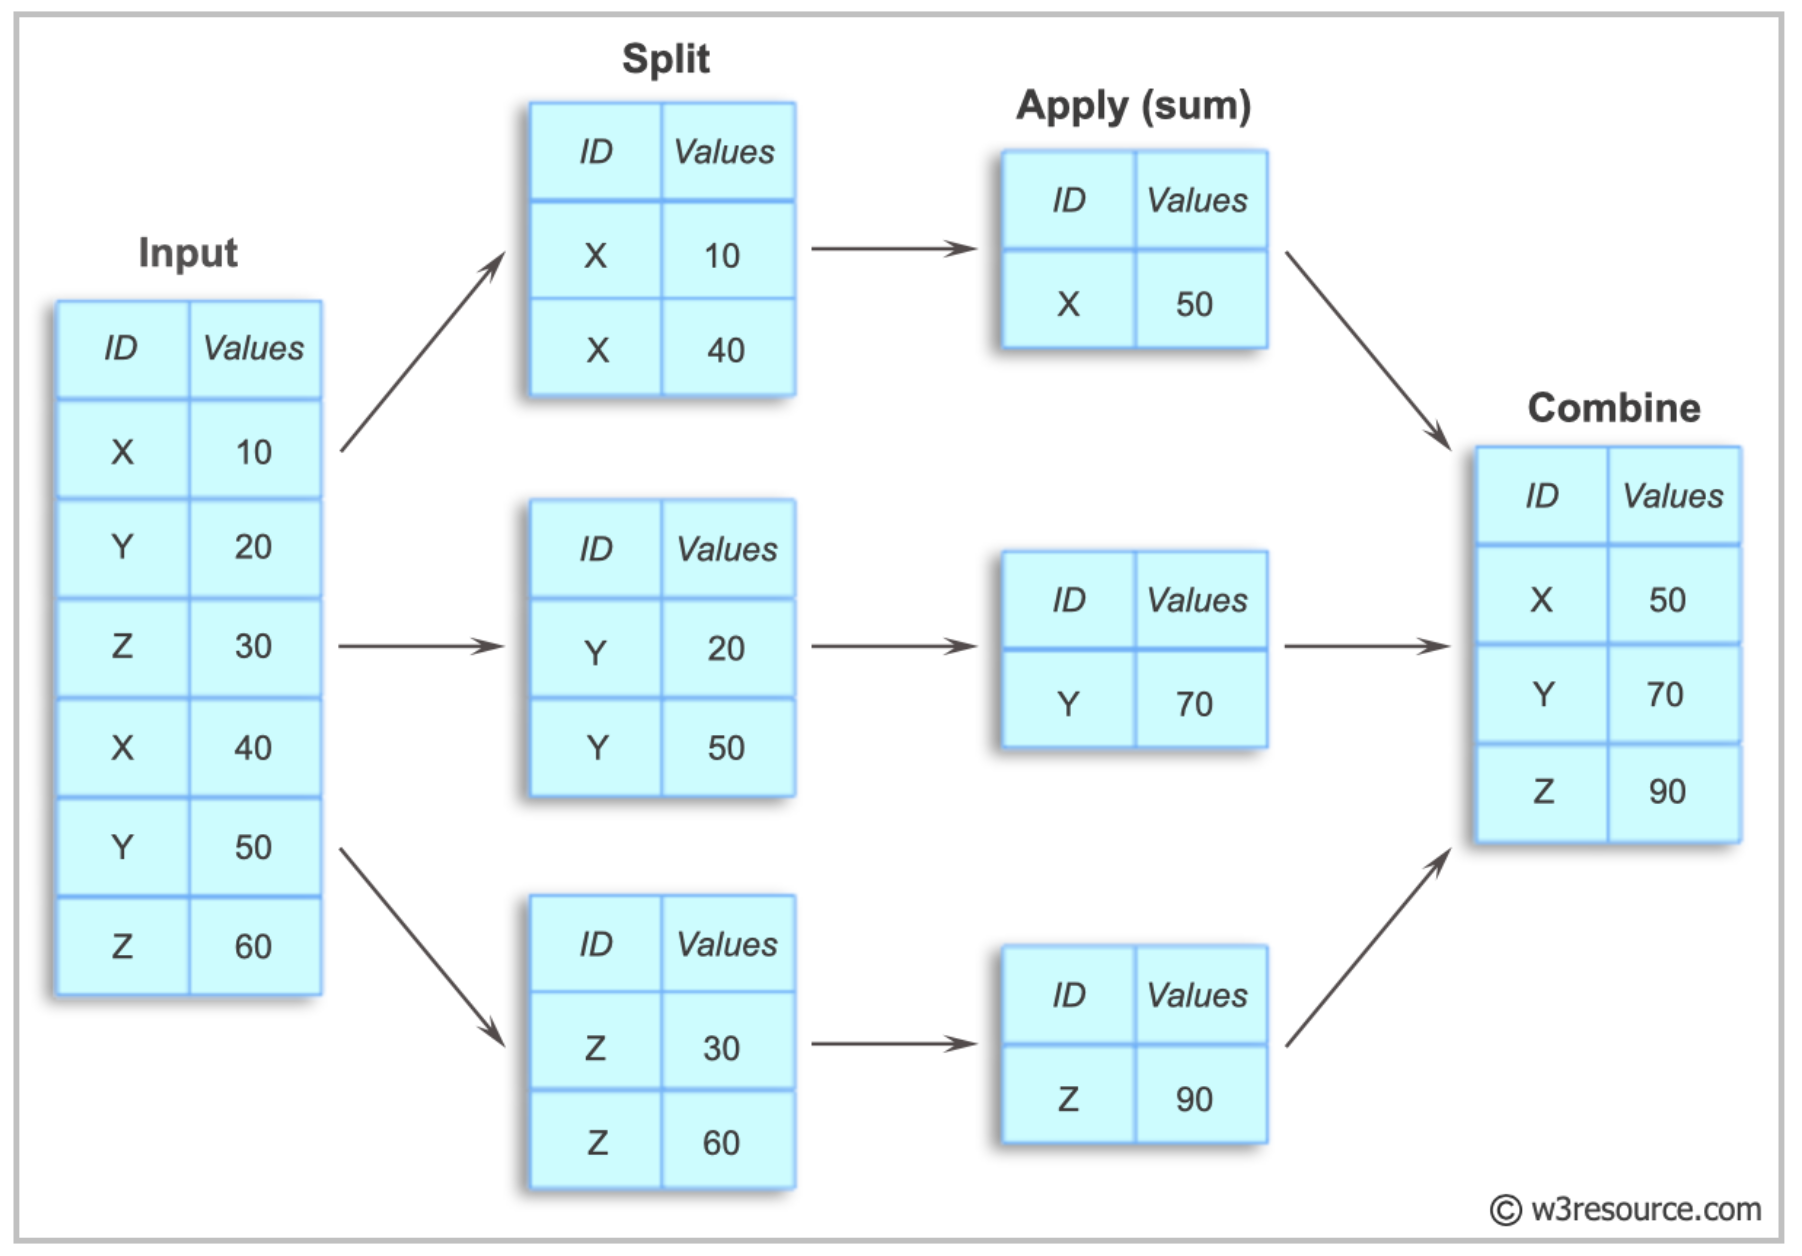
</div>
<br>


In [271]:
df = pd.DataFrame(
    {
        "ID": ["X", "Y", "Z", "X", "Y", "Z"],
        "Values": [10, 20, 30, 40, 50, 60],
    }
)

df

,ID,Values
0,X,10
1,Y,20
2,Z,30
3,X,40
4,Y,50
5,Z,60


In [278]:
df.ID.unique()

array(['X', 'Y', 'Z'], dtype=object)

In [276]:
# See a particular group by get_group()
df.groupby("ID").get_group('X')

,ID,Values
0,X,10
3,X,40


In [199]:
df_grouped = df.groupby("ID").sum()
df_grouped

,Values
ID,
X,50
Y,70
Z,90


In [212]:
# Representing a cafe transaction dataset
df = pd.DataFrame(
    {
        "CustomerName": ["Alice", "Bob", "Eve", "Bob", "Alice", "Charlie", "Alice", "Eve"],
        "DrinkOrdered": ["Coffee", "Tea", "Coffee", "Latte", "Tea", "Latte", "Coffee", "Tea"],
        "PricePaid": [3.50, 2.75, 3.50, 4.00, 2.75, 4.00, 3.50, 2.75],
        "LoyaltyPointsEarned": [7, 5, 7, 8, 5, 8, 7, 5],
    }
)

df

,CustomerName,DrinkOrdered,PricePaid,LoyaltyPointsEarned
0,Alice,Coffee,3.50,7
1,Bob,Tea,2.75,5
2,Eve,Coffee,3.50,7
3,Bob,Latte,4.00,8
4,Alice,Tea,2.75,5
5,Charlie,Latte,4.00,8
6,Alice,Coffee,3.50,7
7,Eve,Tea,2.75,5


In [204]:
df.groupby("CustomerName").sum()

# The sum over column DrinkOrdered doesn't look meaningful, 
# let's take sum over only PricePaid and LoyaltyPointsEarned in the next cell.

,DrinkOrdered,PricePaid,LoyaltyPointsEarned
CustomerName,,,
Alice,CoffeeTeaCoffee,9.75,19
Bob,TeaLatte,6.75,13
Charlie,Latte,4.00,8
Eve,CoffeeTea,6.25,12


In [206]:
df.groupby("CustomerName")[["PricePaid","LoyaltyPointsEarned"]].sum()

,PricePaid,LoyaltyPointsEarned
CustomerName,,
Alice,9.75,19
Bob,6.75,13
Charlie,4.00,8
Eve,6.25,12


In [215]:
# Group by CustomerName and present counts for other columns
customer_order_count = df.groupby('CustomerName').count()
customer_order_count


,DrinkOrdered,PricePaid,LoyaltyPointsEarned
CustomerName,,,
Alice,3,3,3
Bob,2,2,2
Charlie,1,1,1
Eve,2,2,2


In [221]:
max_price_per_customer = df.groupby('CustomerName').max()
max_price_per_customer


,DrinkOrdered,PricePaid,LoyaltyPointsEarned
CustomerName,,,
Alice,Tea,3.5,7
Bob,Tea,4.0,8
Charlie,Latte,4.0,8
Eve,Tea,3.5,7


**Question**: Does .max() above find the record with max value wrt LoyaltyPointsEarned or PricePaid column?

**Answer**: 
Pandas will determine the maximum value in each column separately for each customer group. 

- For the DrinkOrdered column, pandas will return the drink with the "maximum" value based on string lexicographic order. So, "Tea" is considered larger than "Latte", which is larger than "Coffee".
- For the PricePaid column, pandas will return the maximum price paid by each customer.
- For the LoyaltyPointsEarned column, pandas will return the maximum loyalty points earned by each customer.

# Removing duplicate records (rows)

In [223]:
df = pd.DataFrame(
    {
        "ID": ["X", "Y", "Z", "Z"],
        "Values": [10, 20, 30, 30],
    }
)

df

,ID,Values
0,X,10
1,Y,20
2,Z,30
3,Z,30


In [226]:
# Finding duplicates
df.duplicated()

0    False
1    False
2    False
3     True
dtype: bool

In [227]:
df[df.duplicated()]

,ID,Values
3,Z,30


In [228]:
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,ID,Values
0,X,10
1,Y,20
2,Z,30


## Using unique()

In [238]:
df = pd.DataFrame(
    {
        "ID": ["Türkiye", "Germany", "Germany", "G ermany", "Türkiye"],
        "Values": [1, 2, 3, 4, 5],
    }
)

df

,ID,Values
0,Türkiye,1
1,Germany,2
2,Germany,3
3,G ermany,4
4,Türkiye,5


In [239]:
# When you have a long list, it's a good idea to check the categories to validate the data
df["ID"].unique()

# As can be seen below, each category is shown once. Even if there is one mistaken entry
# like "G ermany", it will appear in the unique list.

array(['Türkiye', 'Germany', 'G ermany'], dtype=object)

## Aggregate with agg()

In [231]:
df = pd.DataFrame(
    {
        "ID": ["X", "Y", "Z", "Z"],
        "Values": [10, 20, 30, 30],
    }
)

df

,ID,Values
0,X,10
1,Y,20
2,Z,30
3,Z,30


In [232]:
# Example 1: Aggregate using multiple functions on the "Values" column
result1 = df.agg({
    'Values': ['sum', 'mean', 'std', 'min', 'max']
})

result1

,Values
sum,90.000000
mean,22.500000
std,9.574271
min,10.000000
max,30.000000


In [230]:
# Example 2: Using different aggregation functions for each column
result2 = df.agg({
    'ID': 'count',
    'Values': 'mean'
})

result2

ID         4.0
Values    22.5
dtype: float64

In [235]:
# Example 3: Aggregate using a custom function

def range_func(x):      # finds the entry with maximum value and returns its square.
    return x.max()**2   

result3 = df.agg({'Values': range_func})

result3

Values    900
dtype: int64